In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


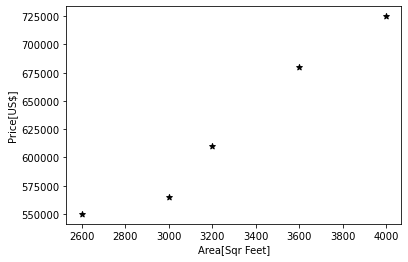

In [3]:
%matplotlib inline
plt.xlabel("Area[Sqr Feet]")
plt.ylabel("Price[US$]")
plt.scatter(df.area,df.price,color='black',marker='*')


In [4]:
x=linear_model.LinearRegression()
x.fit(df[['area']],df.price)

LinearRegression()

In [5]:
x.predict([[5000]])

array([859554.79452055])

In [6]:
x.coef_

array([135.78767123])

In [7]:
x.intercept_

180616.43835616432

In [8]:
y=x.coef_*5000+x.intercept_
y

array([859554.79452055])

In [9]:
p=pd.read_csv('areas.csv')
p

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [10]:
q=x.predict(p)
q

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [11]:
p['price']=q

In [12]:
p.to_csv('prediction.csv',index=False)
p

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


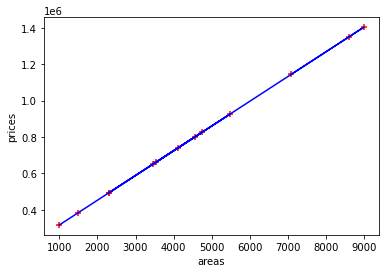

In [13]:
%matplotlib inline
plt.xlabel("areas")
plt.ylabel("prices")
plt.scatter(p.area,p.price,color='red',marker='+')
plt.plot(p[['area']],x.predict(p[['area']]),color='blue')

In [14]:
import pickle

In [16]:
with open('model_pickle','wb') as f:
    pickle.dump(x,f)

In [17]:
with open('model_pickle','rb') as f:
    model=pickle.load(f)
model.predict([[5000]])

array([859554.79452055])

In [22]:
import joblib
joblib.dump(x,'model_joblib')
model=joblib.load('model_joblib')

In [24]:
model.predict([[5000]])

array([859554.79452055])

In [25]:
model.coef_

array([135.78767123])

In [26]:
model.intercept_

180616.43835616432